## Introduction
Exploratory Data Analysis (EDA) is an essential step in the data analysis pipeline. It involves summarizing the main characteristics of a dataset, often using visual methods, to uncover underlying patterns and insights. In this notebook, we will cover the following major operations:

1. Data Loading and Initial Exploration
2. Data Cleaning and Preprocessing
3. Statistical Analysis
4. Data Visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
sns.set(style="whitegrid")

In [8]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [9]:
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [11]:
#df.head(4)

In [12]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [14]:
# Data cleaning can be done here but our data is already clean so will do next step

Descriptive Statistics

In [17]:
#mean = df.mean()
#median = df.median()
mode = df.mode().iloc[0]

#mean, median, mode

Correlation Analysis


In [18]:
correlation_matrix = df.iloc[:, :-1].corr()

In [19]:
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Grouping and Aggregation

In [20]:
grouped_data = df.groupby('species').mean()

grouped_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Data Visualization

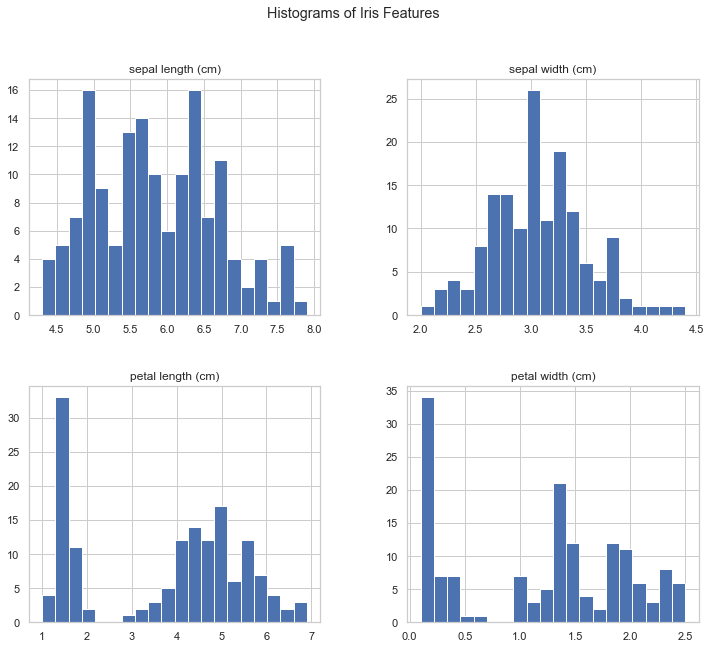

In [21]:
df.drop('species', axis=1).hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Iris Features')
plt.show()

Histograms provide a visual representation of the distribution of numerical features in the dataset. Each histogram shows the frequency distribution of one feature:

1. Sepal Length (cm): The histogram might show that sepal lengths are roughly normally distributed, with most values clustered around the mean.
2. Sepal Width (cm): This histogram  show that sepal widths have a different distribution pattern, with a wider spread.
3. Petal Length (cm): Petal length histograms  show a right-skewed distribution, with most values being relatively small.
4. Petal Width (cm): Similarly, petal width is also  right-skewed.

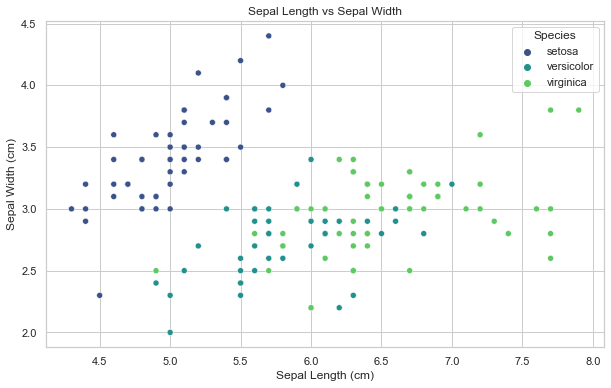

In [22]:
#plots to visualize relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


The scatter plot shows the relationship between sepal length and sepal width, with points colored by species:

Setosa: Setosa species have smaller sepal lengths and wider sepals compared to the other two species. 

Versicolor and Virginica: These species are overlaping more in their sepal measurements. However, Versicolor might have slightly longer and narrower sepals than Virginica.

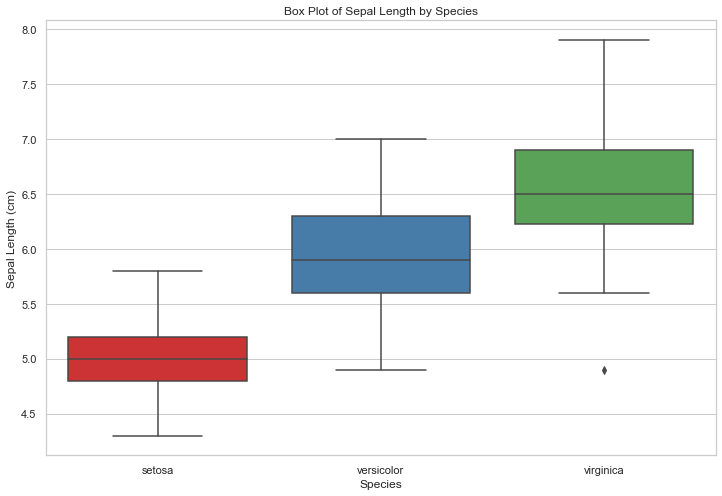

In [23]:
# box plots to visualize the distribution of numerical data by species
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal length (cm)', data=df, palette='Set1')
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()


The box plot displays the distribution of sepal length for each species:

1. Setosa: Have a smaller median sepal length and a narrower interquartile range (IQR).
2. Versicolor: Have a slightly larger median and broader range than Setosa, with a moderate spread.
4. Virginica: It has the largest median sepal length and the widest range, with a broader IQR compared to Setosa and Versicolor.

Box plots illustrate the central tendency (median), variability (IQR), and presence of any outliers in sepal length by species.

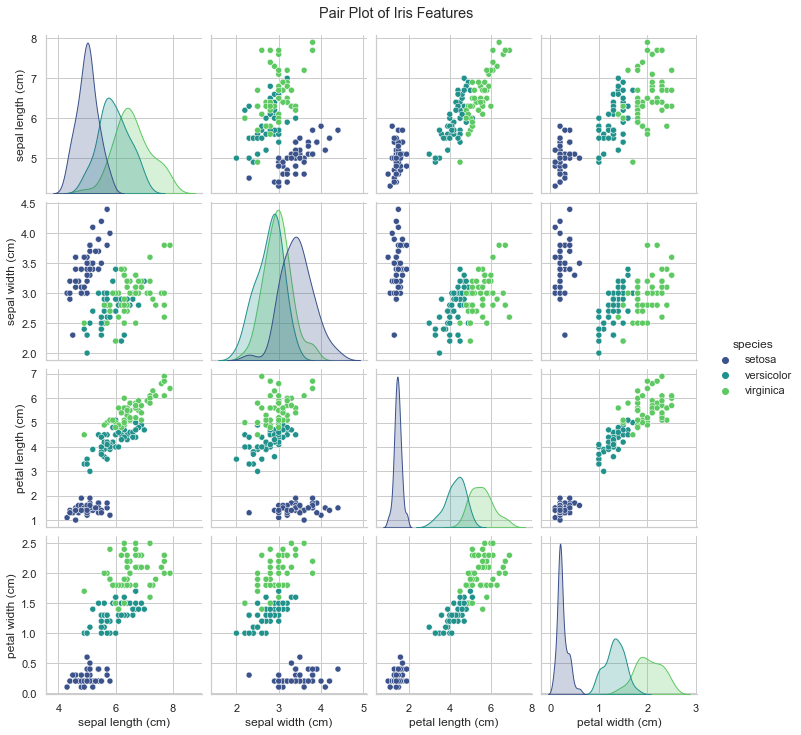

In [24]:
#pair plots to visualize relationships between multiple numerical variables
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()


The pair plot shows scatter plots for every pair of features along with histograms on the diagonal:

Diagonal Histograms: Show the distribution of each feature, similar to the individual histograms discussed earlier.

Off-Diagonal Scatter Plots: Display pairwise relationships between features:

1. Sepal Length vs Sepal Width: Setosa might is more distinct.

2. Petal Length vs Petal Width: Shows clear clusters for different species, with Setosa  having smaller petal dimensions compared to Versicolor and Virginica.

3. Sepal Dimensions vs Petal Dimensions: Petal dimensions are more distinct among species, providing better separation.

Pair plots are powerful for visualizing relationships and correlations between multiple variables, and they can help in identifying patterns or clusters in the data.